# Abundâncias solares: Asplund et al. (2021, A&A, 653, A141)

## Gerando o arquivo com os dados

In [1]:
%%writefile solar_abundances.txt
# Solar Photospheric Abundances. When photospheric abundances were not present, meteoritic abundances were adopted, except for He (helioseismology).
# M. Asplund, A. M. Armasi, N. Grevesse https://ui.adsabs.harvard.edu/abs/2021A%26A...653A.141A/abstract
# Mean atomic weights from 2001 IUPAC table: www.chem.qmul.ac.uk/iupac/AtWt/
# Z El  A_Sun  atomic_wt
 1 H   12.00    1.00794
 2 He  10.91    4.002602
 3 Li   0.96    6.941
 4 Be   1.38    9.012182
 5 B    2.70   10.811
 6 C    8.46   12.0107
 7 N    7.83   14.0067
 8 O    8.69   15.9994
 9 F    4.40   18.9984032
10 Ne   8.06   20.1797
11 Na   6.22   22.989770
12 Mg   7.55   24.3050
13 Al   6.43   26.981538
14 Si   7.51   28.0855
15 P    5.41   30.973761
16 S    7.12   32.065
17 Cl   5.31   35.453
18 Ar   6.38   39.948
19 K    5.07   39.0983
20 Ca   6.30   40.078
21 Sc   3.14   44.955910
22 Ti   4.97   47.867
23 V    3.90   50.9415
24 Cr   5.62   51.9961
25 Mn   5.42   54.938049
26 Fe   7.46   55.845
27 Co   4.94   58.933200
28 Ni   6.20   58.6934
29 Cu   4.18   63.546
30 Zn   4.56   65.409
31 Ga   3.02   69.723
32 Ge   3.62   72.64
33 As   2.30   74.92160
34 Se   3.34   78.96
35 Br   2.54   79.904
36 Kr   3.12   83.798
37 Rb   2.32   85.4678
38 Sr   2.83   87.62
39 Y    2.21   88.90585
40 Zr   2.59   91.224
41 Nb   1.47   92.90638
42 Mo   1.88   95.94
44 Ru   1.75   101.07
45 Rh   0.78   102.90550
46 Pd   1.57   106.42
47 Ag   0.96   107.8682
48 Cd   1.71   112.411
49 In   0.80   114.818
50 Sn   2.02   118.710
51 Sb   1.01   121.760
52 Te   2.18   127.60
53 I    1.55   126.90447
54 Xe   2.22   131.293
55 Cs   1.08   132.90545
56 Ba   2.27   137.327
57 La   1.11   138.9055
58 Ce   1.58   140.116
59 Pr   0.75   140.90765
60 Nd   1.42   144.24
62 Sm   0.95   150.36
63 Eu   0.52   151.964
64 Gd   1.08   157.25
65 Tb   0.31   158.92534
66 Dy   1.10   162.500
67 Ho   0.48   164.93032
68 Er   0.93   167.259
69 Tm   0.11   168.93421
70 Yb   0.85   173.04
71 Lu   0.10   174.967
72 Hf   0.85   178.49
73 Ta  -0.15   180.9479
74 W    0.79   183.84
75 Re   0.26   186.207
76 Os   1.35   190.23
77 Ir   1.32   192.217
78 Pt   1.61   195.078
79 Au   0.91   196.96655
80 Hg   1.17   200.59
81 Tl   0.92   204.3833
82 Pb   1.95   207.2
83 Bi   0.65   208.98038
90 Th   0.03   232.0381
92 U   -0.54   238.02891

Writing solar_abundances.txt


## Plot abundância vs. número atômico (Z)

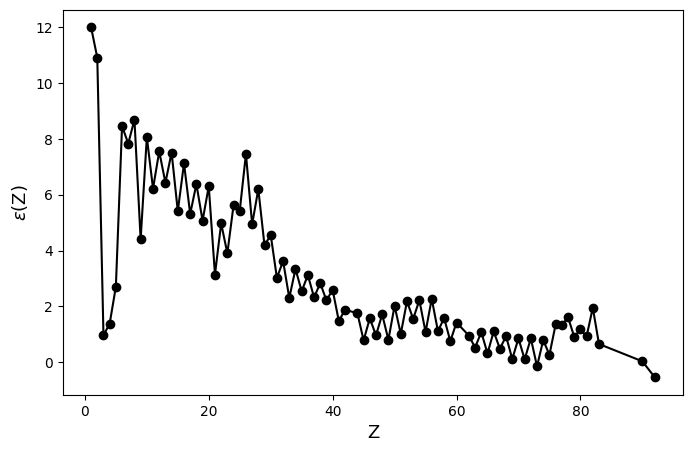

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("solar_abundances.txt", skip_header=3)

z = data[:,0]
eps = data[:,2]

plt.figure(figsize=(8,5))
plt.plot(z, eps, marker='o', linestyle='-', color='k')
plt.xlabel('Z', fontsize=13)
plt.ylabel(r'$\epsilon$(Z)', fontsize=13)
plt.show()

## Cálculo de frações de massa Y e Z: eqs. (1.7) e (1.8)

Eq. (1.7):
$Y = \frac{4 (n_\text{He}/n_\text{H})}{1 + 4 (n_\text{He}/n_\text{H})+ \sum A_i (n_i/n_\text{H})}$

Eq. (1.8):
$Z = \frac{\sum A_i (n_i/n_\text{H})}{1 + 4 (n_\text{He}/n_\text{H})+ \sum A_i (n_i/n_\text{H})}$

Além disso, da eq. (1.2), temos que $\frac{n_\text{X}}{n_\text{H}} = 10^{-12} \; 10^{\epsilon(\text{X})}$

In [3]:
import numpy as np

z = data[:, 0]
eps = data[:, 2]
a = data[:, 3]

# He abundance
eps_he = eps[1]

# n_He/n_H ratio
n_he_h = 1e-12 * 10**eps_he

# Sum of heavier elements (Z > 2)
soma = np.sum(a[2:] * 1e-12 * 10**eps[2:])

# Denominador das frações
denom = 1 + 4 * n_he_h + soma

# Frações de massa
Y = (4 * n_he_h) / denom
Z = soma / denom

print(f"Y = {Y}")
print(f"Z = {Z}")


Y = 0.24192264558500867
Z = 0.014002664876121557


## Desafios

1 -) Calcular a fração de massa do O

2-) Plot de fração de massa de todos os elementos vs. Z

In [4]:
#Fraction of O
import matplotlib.pyplot as plt

#He abundance
eps_he = eps[1]

z = data[:, 0]
eps = data[:, 2]
a = data[:, 3]

#n_He/n_H ratio
n_he_h = 1e-12 * 10**eps_he

#Sum of heavier elements (Z > 2)
soma = np.sum(a[2:] * 1e-12 * 10**eps[2:])

#Denominator
denom = 1 + 4 * n_he_h + soma

#Mass fraction of each element
X_i = (a * 1e-12 * 10**eps) / denom

#O mass fraction
X_O = X_i[7]

print(f"X_O = {X_O}")

X_O = 0.005830693708214867


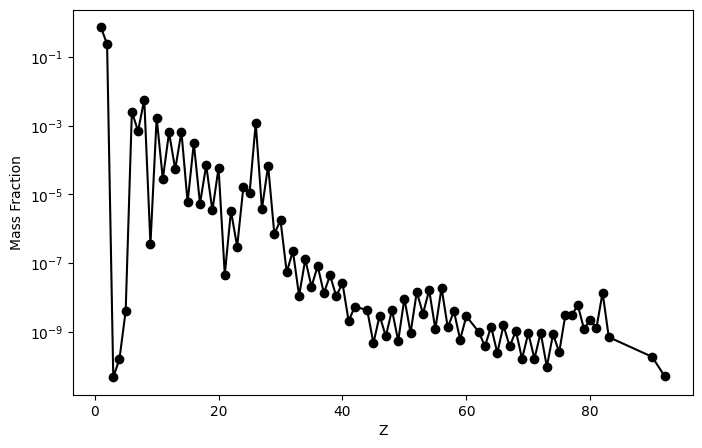

In [5]:
# Mass fraction plot
plt.figure(figsize=(8,5))
plt.plot(z, X_i,marker = 'o', color = 'black')
plt.yscale("log")
plt.xlabel("Z")
plt.ylabel("Mass Fraction")
plt.show()

# Geneva-Copenhagen survey (GCS): ajuste [Fe/H] vs. excentricidade

Dados disponíveis em: https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/530/A138 (mas a tabela usada aqui foi modificada, excluindo NaNs e ajustando a formatação para ficar mais fácil de lidar no Python)

Como o arquivo é grande, é melhor fazer upload no drive e montar o drive no Colab

Vamos fazer um plot de metalicidade vs. excentricidade da órbita Galáctica

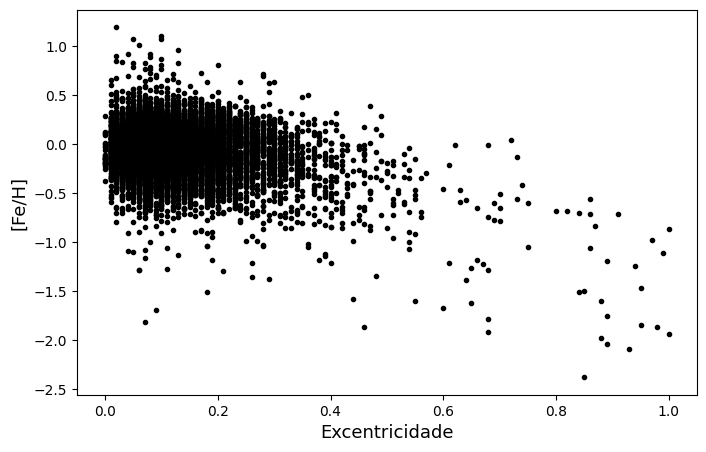

In [7]:
#to run this code, it is necessary to upload the csv file to colab or personal cmputer
import pandas as pd

data_cgs = pd.read_csv("catalog_gcs.csv")

feh = data_cgs["[Fe/H]"] #Fraction Fe/H
exc = data_cgs["ecc"] #excentricity

#plot
plt.figure(figsize=(8,5))
plt.plot(exc, feh, marker='.', linestyle='', color='k')
plt.xlabel('Excentricidade', fontsize=13)
plt.ylabel('[Fe/H]', fontsize=13)
plt.show()

## Ajuste linear

Definição da função que queremos ajustar:

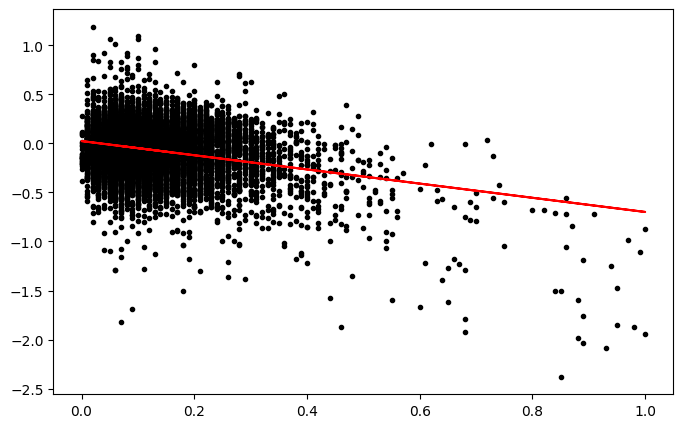

In [8]:
import numpy as np

#finds linear parameters
coeff = np.polyfit(exc, feh, 1)

#plot
plt.figure(figsize=(8,5))
plt.plot(exc, np.polyval(coeff, exc), color = 'red', zorder = 1000)
plt.plot(exc, feh, marker='.', linestyle='', color='k')



## Desafio: ajuste com polinômio quadrático

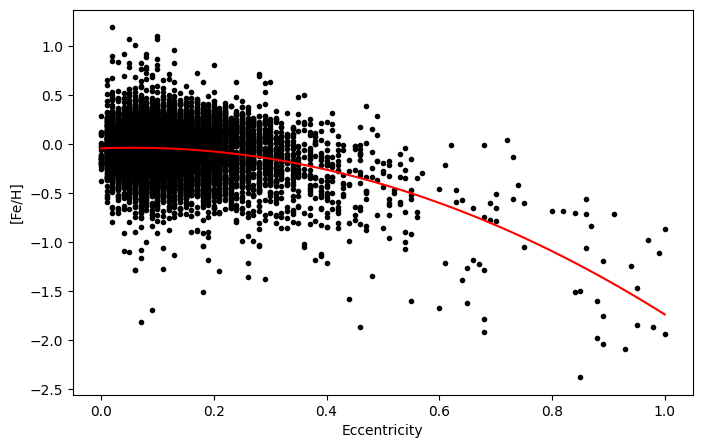

In [9]:
## Ajuste
import numpy as np
from scipy.optimize import curve_fit

#quadratic function
def quadratic(x, a, b, c):
  return a*x**2 + b*x + c

#finds parameters
popt, pcov = curve_fit(quadratic, exc, feh)
x = np.linspace(0,1,100)

#plot
plt.figure(figsize=(8,5))
plt.plot(exc, feh, marker='.', linestyle='', color='k')
plt.plot(x, popt[0]*x**2+popt[1]*x+popt[2], color='r')
plt.xlabel("Eccentricity")
plt.ylabel("[Fe/H]")
plt.show()

In [10]:
import numpy as np

# Função para calcular n_X/n_H a partir de A(X)
def nx_nHsun(A):
    return 10**(A - 12)

# Leitura do arquivo de abundâncias solares
data = np.genfromtxt("solar_abundances.txt", skip_header=3)

# Extração do número atômico (Z) e abundâncias A(X)
z = data[:, 0]  # Número atômico (Z)
A = data[:, 2]  # Abundâncias A(X)

# Índices para carbono (Z = 6) e oxigênio (Z = 8)
idxC_sun = np.where(z == 6)  # Carbono
idxO_sun = np.where(z == 8)  # Oxigênio

# Cálculo de n_C/n_H e n_O/n_H
nC_nHsun = nx_nHsun(A[idxC_sun[0][0]])  # n_C/n_H para o Sol
nO_nHsun = nx_nHsun(A[idxO_sun[0][0]])  # n_O/n_H para o Sol

# Resultados
print(f'nC/nH = {nC_nHsun}')
print(f'nO/nH = {nO_nHsun}')
print(f'(C/O)sun: {nC_nHsun / nO_nHsun}')

nC/nH = 0.00028840315031266115
nO/nH = 0.0004897788193684457
(C/O)sun: 0.5888436553555907


In [11]:
import numpy as np

# Função para calcular n_X/n_H a partir de A(X)
def nx_nHsun(A):
    return 10**(A - 12)

data = np.genfromtxt("solar_abundances.txt", skip_header=3)

z = data[:,0]
A = data[:,2]

idxC_sun = np.where(z==6)
idxO_sun = np.where(z==8)

# Abundâncias de carbono e oxigênio para HD 75732 (Delgado Mena et al. 2010)
A_C = A[idxC_sun[0][0]] + 0.30  # [C/H] = 0.30
A_O = A[idxO_sun[0][0]] + 0.07  # [O/H] = 0.07

# Razões n_C/n_H e n_O/n_H
nC_nH = nx_nHsun(A_C)
nO_nH = nx_nHsun(A_O)

# Razão C/O
C_O_ratio = nC_nH / nO_nH

print(f'(C/O) Delgado: {C_O_ratio}')

(C/O) Delgado: 1.0000000000000042


In [12]:
import numpy as np

def nx_nHsun(A):
    return 10**(A - 12)

# Abundâncias de carbono e oxigênio para HD 75732 (Teske et al. 2013)
A_C = 8.73
A_O = 8.92

# Razões n_C/n_H e n_O/n_H
nC_nH = nx_nHsun(A_C)
nO_nH = nx_nHsun(A_O)

# Razão C/O
C_O_ratio = nC_nH / nO_nH

print(f'(C/O)Teker: {C_O_ratio}')

(C/O)Teker: 0.6456542290346563


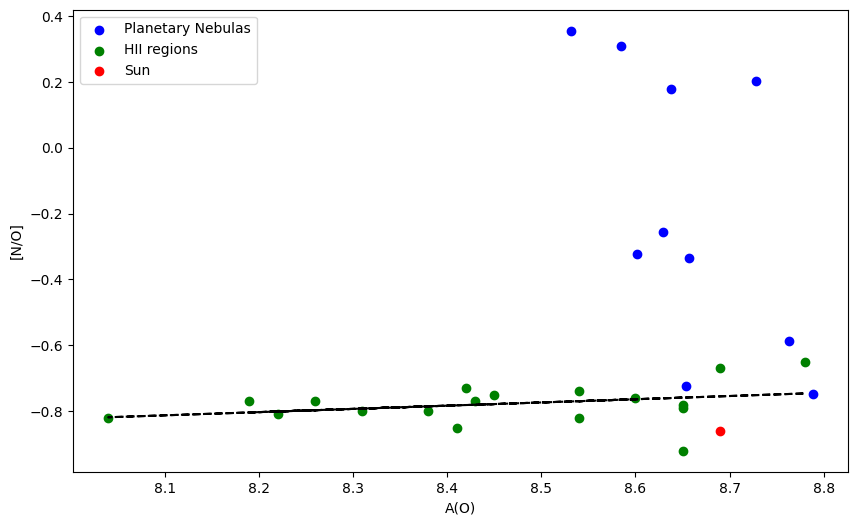

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# su8n data
A_N_sun = 7.83
A_O_sun = 8.69
N_O_sun = A_N_sun - A_O_sun

# Data
# planetary nebulas
nebula_names = ["NGC2438", "A4", "K1-7", "NGC6884", "Hu1-1", "IC 2003", "K3-61", "M3-3", "He1-5", "M3-28"]
n_N_nH_nebula = np.array([0.85, 2.36, 7.70, 2.10, 1.50, 1.90, 7.83, 6.56, 1.10, 8.52]) * 1e-4
n_O_nH_nebula = np.array([4.50, 4.26, 3.40, 4.54, 5.80, 4.00, 3.84, 4.34, 6.14, 5.35]) * 1e-4
# HII regions
A_N_HII = np.array([7.73, 7.87, 7.80, 7.86, 8.02, 8.13, 7.66, 7.84, 7.72, 7.69, 7.41, 7.56, 7.51, 7.58, 7.22, 7.49, 7.42, 7.70])
A_O_HII = np.array([8.65, 8.65, 8.54, 8.65, 8.69, 8.78, 8.43, 8.60, 8.54, 8.42, 8.22, 8.41, 8.31, 8.38, 8.04, 8.26, 8.19, 8.45])
N_O_HII = A_N_HII - A_O_HII

# Calculates [N/O] for planetary nebulas
A_N_nebula = np.log10(n_N_nH_nebula) + 12
A_O_nebula = np.log10(n_O_nH_nebula) + 12
N_O_nebula = A_N_nebula - A_O_nebula

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(A_O_nebula, N_O_nebula, color='blue', label='Planetary Nebulas')
plt.scatter(A_O_HII, N_O_HII, color='green', label='HII regions')
plt.scatter(A_O_sun, N_O_sun, color='red', label='Sun')

# Linear fit
coeff = np.polyfit(A_O_HII, N_O_HII, 1)
plt.plot(A_O_HII, np.polyval(coeff, A_O_HII), color='black', linestyle='--')
plt.xlabel('A(O)')
plt.ylabel('[N/O]')
plt.legend()
plt.show()
